## <font size=5> <strong>Heart Disease Prediction


## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart (1).csv', 'sample_data']


## II. Importing and understanding our dataset

In [2]:
dataset = pd.read_csv("heart (1).csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


#### Description

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
###, we have no missing values

#### Let's understand our columns better:

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [11]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [12]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [14]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

<Axes: >

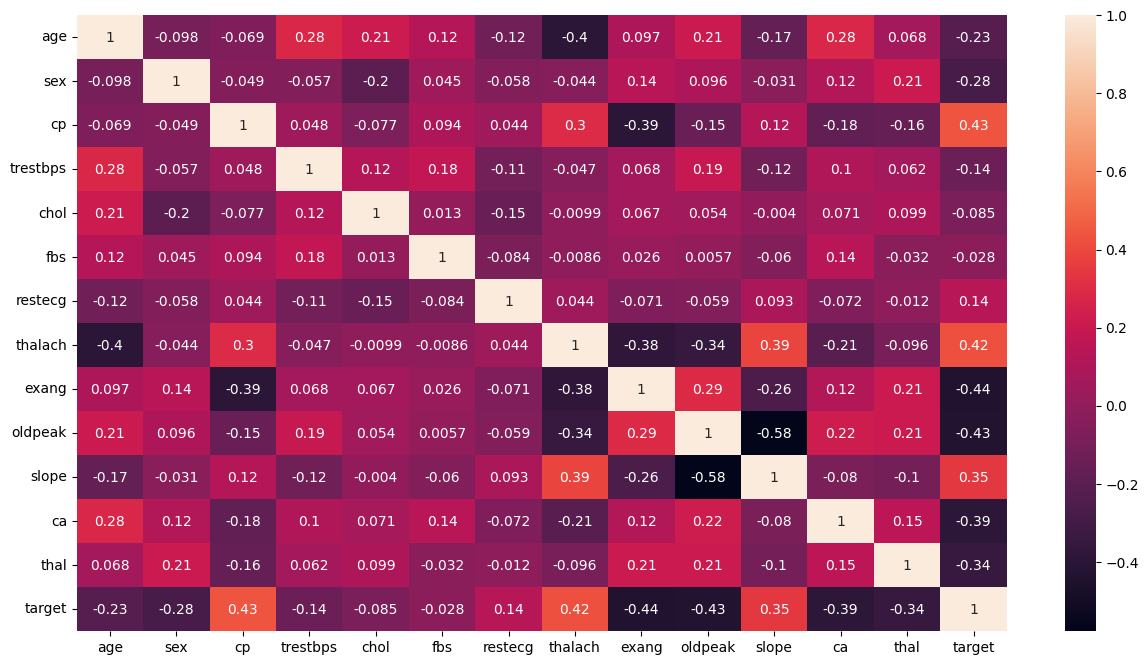

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot=True)

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


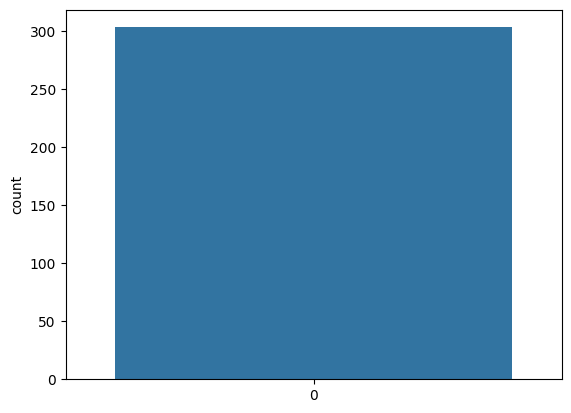

In [17]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [18]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))



Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [19]:
dataset["sex"].unique()

array([1, 0])

<Axes: xlabel='target', ylabel='count'>

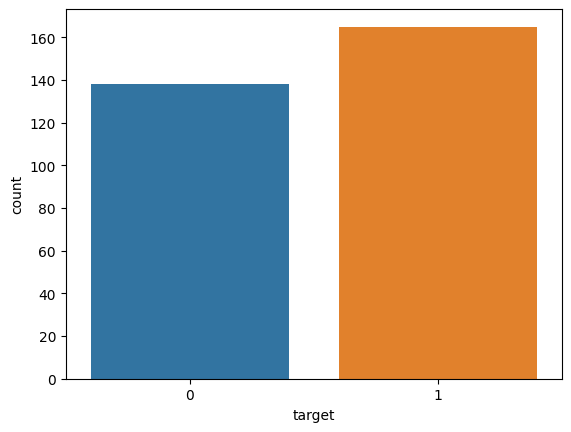

In [20]:
sns.countplot(data=dataset,x="target")

##### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

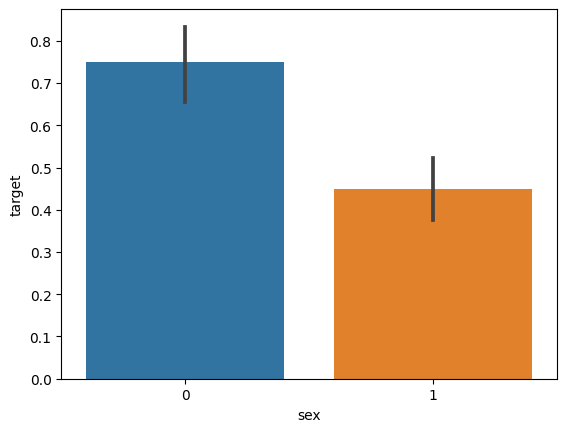

In [21]:
sns.barplot(data=dataset,x="sex",y="target")

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [22]:
dataset["cp"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

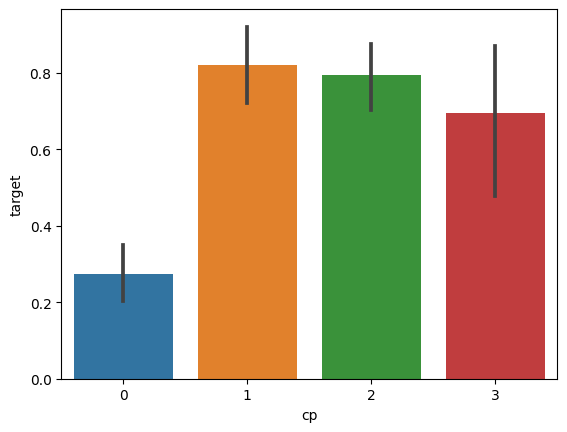

In [23]:
sns.barplot(data=dataset,x="cp",y="target")

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [24]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [25]:
dataset["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

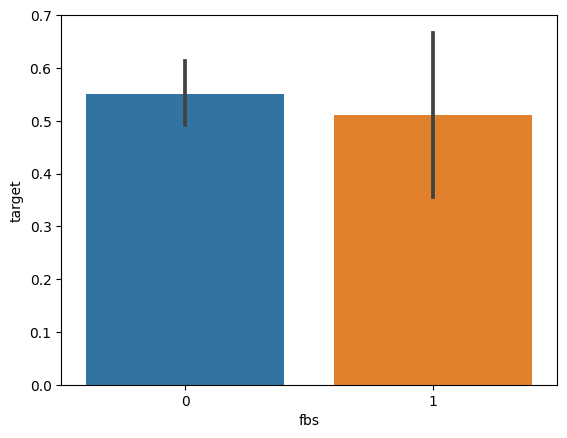

In [26]:
sns.barplot(data=dataset,x="fbs",y="target")

##### Nothing extraordinary here

### Analysing the restecg feature

In [27]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

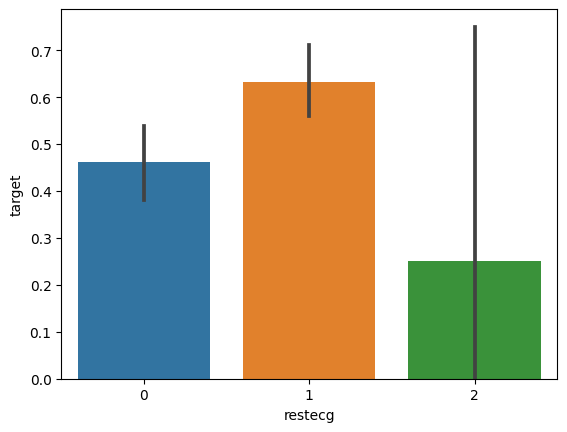

In [28]:
sns.barplot(data=dataset,x="restecg",y="target")

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [29]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

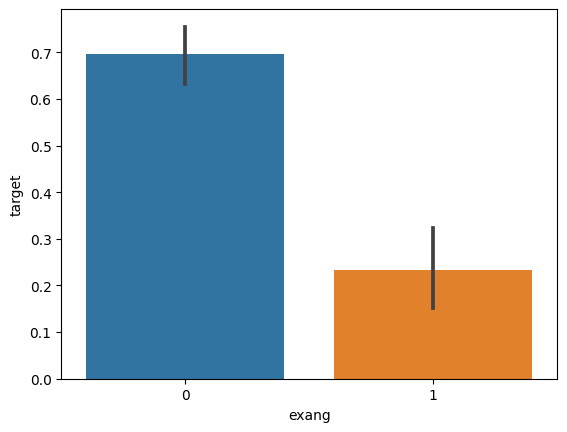

In [30]:
sns.barplot(data=dataset,x="exang",y="target")

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [31]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='target'>

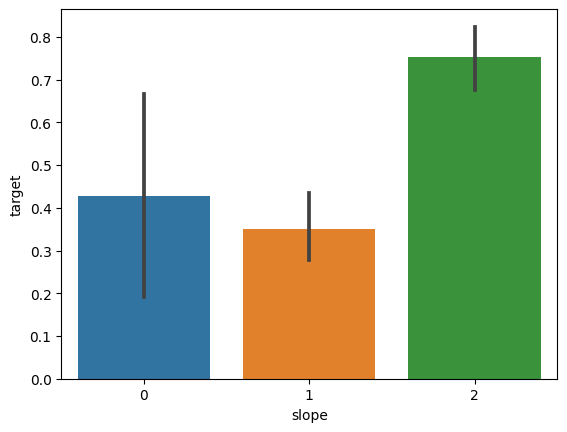

In [32]:
sns.barplot(data=dataset,x="slope",y="target")

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [33]:
#number of major vessels (0-3) colored by flourosopy

In [34]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: ylabel='count'>

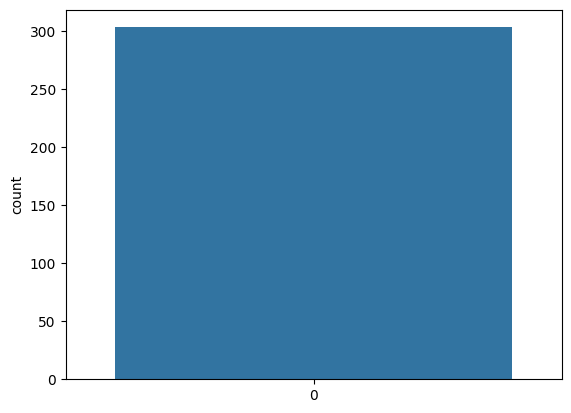

In [35]:
sns.countplot(dataset["ca"])

<Axes: xlabel='ca', ylabel='target'>

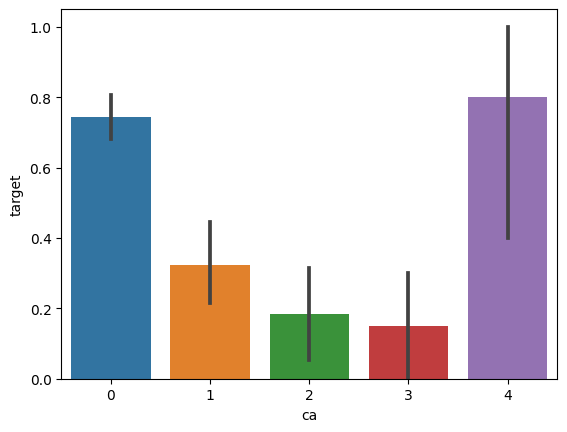

In [36]:
sns.barplot(data=dataset,x="ca",y="target")

##### ca=4 has astonishingly large number of heart patients

In [37]:
### Analysing the 'thal' feature

In [38]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='target'>

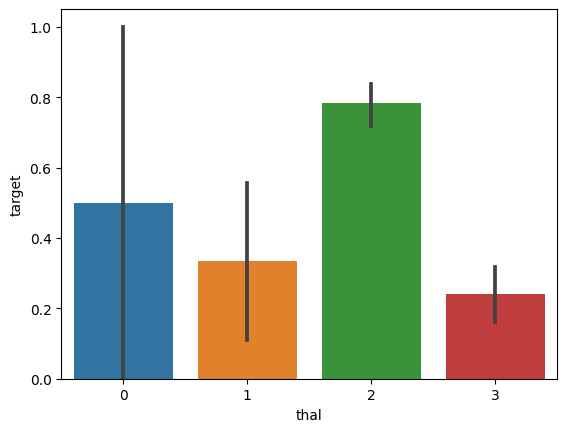

In [39]:
sns.barplot(data=dataset,x="thal",y="target")

<Axes: xlabel='thal', ylabel='Density'>

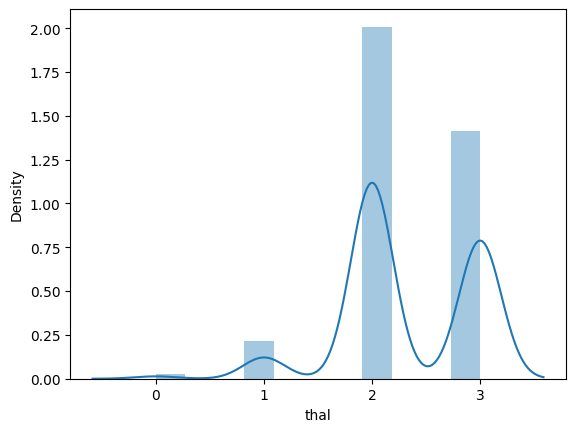

In [40]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [41]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [42]:
X_train.shape

(242, 13)

In [43]:
X_test.shape

(61, 13)

In [44]:
Y_train.shape

(242,)

In [45]:
Y_test.shape

(61,)

## V. Model Fitting

In [46]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


lr = LogisticRegression()


param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)


grid_search.fit(X_train, Y_train)


best_lr = grid_search.best_estimator_


Y_pred_lr_train = best_lr.predict(X_train)


Y_pred_lr_test = best_lr.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy_train_lr = round(accuracy_score(Y_train, Y_pred_lr_train)*100,3)
print(f"The Logistic Regression Model Training Accuracy: {accuracy_train_lr}")


accuracy_test_lr = round(accuracy_score(Y_test, Y_pred_lr_test)*100,3)
print(f"The Logistic Regression Model Test Accuracy: {accuracy_test_lr}")

The Logistic Regression Model Training Accuracy: 84.298
The Logistic Regression Model Test Accuracy: 85.246


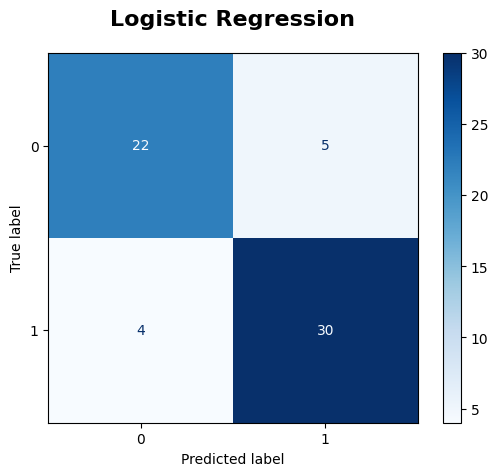

In [48]:
cm = confusion_matrix(Y_test, Y_pred_lr_test, labels=best_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=best_lr.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Logistic Regression',fontsize=16, fontweight='bold',pad=20)
plt.show()

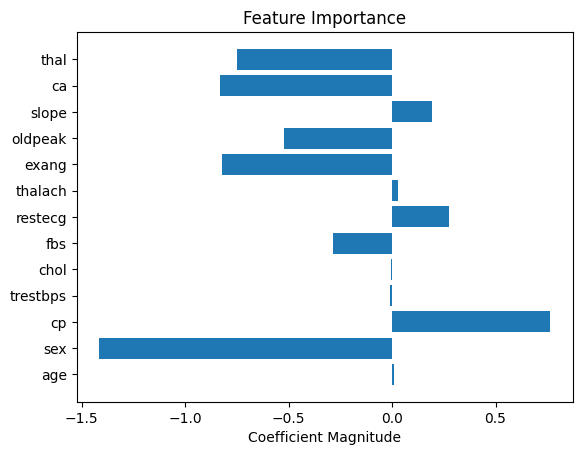

In [49]:
from sklearn.linear_model import LogisticRegression




lr = LogisticRegression()
lr.fit(X_train, Y_train)


feature_importance = lr.coef_[0]


import matplotlib.pyplot as plt

plt.barh(X_train.columns, feature_importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.show()

### Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
X_pred_nb = nb.predict(X_train)

In [51]:
Y_pred_nb.shape

(61,)

In [52]:
accuracy_test_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The Test accuracy score achieved using Naive Bayes is: "+str(accuracy_test_nb)+" %")

accuracy_train_nb = round(accuracy_score(X_pred_nb,Y_train)*100,2)

print("The Train accuracy score achieved using Naive Bayes is: "+str(accuracy_train_nb)+" %")

The Test accuracy score achieved using Naive Bayes is: 85.25 %
The Train accuracy score achieved using Naive Bayes is: 83.47 %


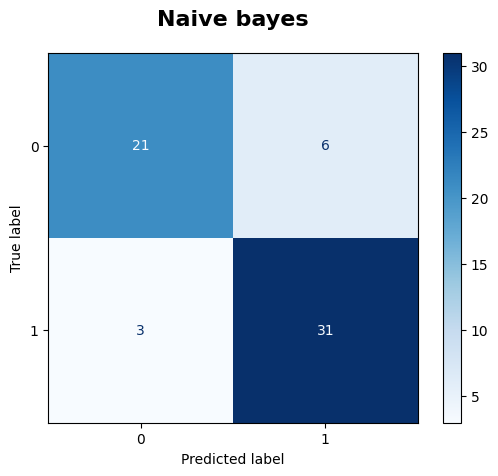

In [53]:
cm = confusion_matrix(Y_test, Y_pred_nb, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=nb.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Naive bayes',fontsize=16, fontweight='bold',pad=20)
plt.show()

In [54]:
print(classification_report(Y_test, Y_pred_nb))
print('----------------------------------')

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

----------------------------------


### SVM

In [55]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)
X_pred_svm = sv.predict(X_train)

In [56]:
Y_pred_svm.shape

(61,)

In [57]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The Test accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")
score_svm1 = round(accuracy_score(X_pred_svm,Y_train)*100,2)

print("The Train accuracy score achieved using Linear SVM is: "+str(score_svm1)+" %")

The Test accuracy score achieved using Linear SVM is: 81.97 %
The Train accuracy score achieved using Linear SVM is: 84.71 %


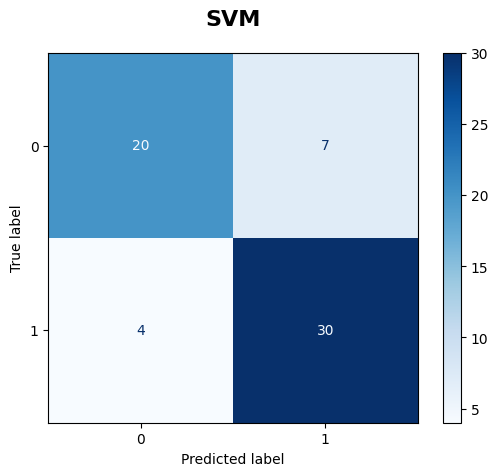

In [58]:
cm = confusion_matrix(Y_test, Y_pred_svm, labels=sv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=sv.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('SVM',fontsize=16, fontweight='bold',pad=20)
plt.show()

In [59]:
print(classification_report(Y_test, Y_pred_svm))
print('----------------------------------')

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61

----------------------------------


### K Nearest Neighbors

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
X_pred_knn=knn.predict(X_train)

In [61]:
Y_pred_knn.shape

(61,)

In [62]:
accuracy_test_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The Test accuracy score achieved using KNN is: "+str(accuracy_test_knn)+" %")
accuracy_train_knn = round(accuracy_score(X_pred_knn,Y_train)*100,2)

print("The Train accuracy score achieved using KNN is: "+str(accuracy_train_knn)+" %")

The Test accuracy score achieved using KNN is: 67.21 %
The Train accuracy score achieved using KNN is: 72.31 %


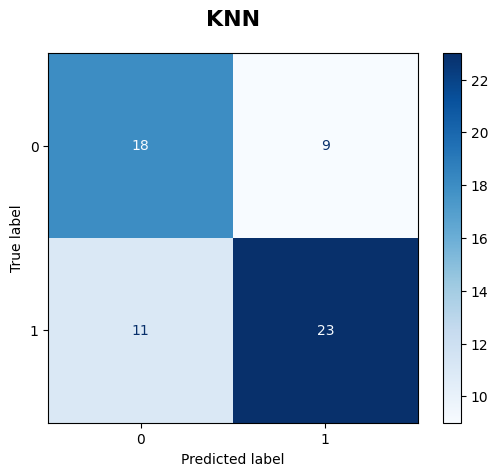

In [63]:
cm = confusion_matrix(Y_test, Y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('KNN',fontsize=16, fontweight='bold',pad=20)
plt.show()

In [64]:
print(classification_report(Y_test, Y_pred_knn))
print('----------------------------------')

              precision    recall  f1-score   support

           0       0.62      0.67      0.64        27
           1       0.72      0.68      0.70        34

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.68      0.67      0.67        61

----------------------------------


### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


dt = DecisionTreeClassifier(ccp_alpha=0.02)



dt.fit(X_train, Y_train)


Y_pred_dt_train = dt.predict(X_train)


Y_pred_dt_test = dt.predict(X_test)


accuracy_train_dt = round(accuracy_score(Y_train, Y_pred_dt_train)*100,2)
print(f"Decision Tree Model Training Accuracy: {accuracy_train_dt}")


accuracy_test_dt = round(accuracy_score(Y_test, Y_pred_dt_test)*100,2)
print(f"Decision Tree Model Test Accuracy: {accuracy_test_dt}")

Decision Tree Model Training Accuracy: 84.3
Decision Tree Model Test Accuracy: 81.97


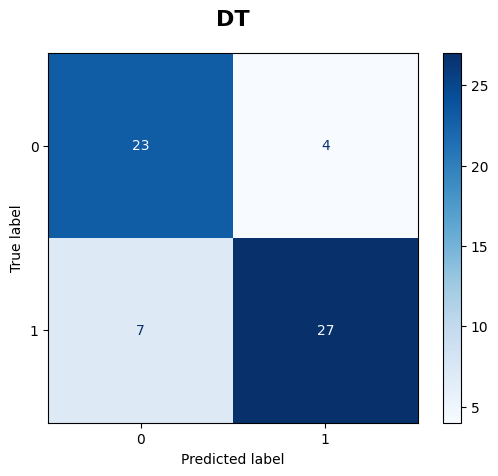

In [66]:
cm = confusion_matrix(Y_test, Y_pred_dt_test, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=dt.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('DT',fontsize=16, fontweight='bold',pad=20)
plt.show()

In [67]:
print(classification_report(Y_test, Y_pred_dt_test))
print('----------------------------------')

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

----------------------------------


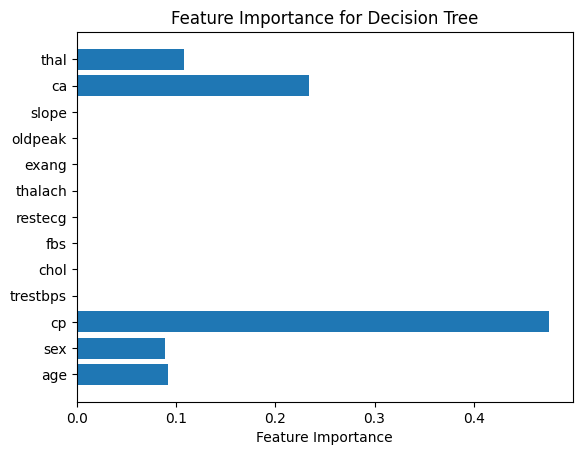

In [68]:



feature_importance = dt.feature_importances_


feature_names = X_train.columns


plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Decision Tree')
plt.show()

### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(n_estimators=50,min_samples_split=10,random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(n_estimators=50,min_samples_split=10,random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
X_pred_rf = rf.predict(X_train)

In [70]:
Y_pred_rf.shape

(61,)

In [71]:
accuracy_test_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The Test accuracy score achieved using Random_forest is: "+str(accuracy_test_rf)+" %")

accuracy_train_rf = round(accuracy_score(X_pred_rf,Y_train)*100,2)

print("The Train accuracy score achieved using Random_forest is: "+str(accuracy_train_rf)+" %")

The Test accuracy score achieved using Random_forest is: 91.8 %
The Train accuracy score achieved using Random_forest is: 93.39 %


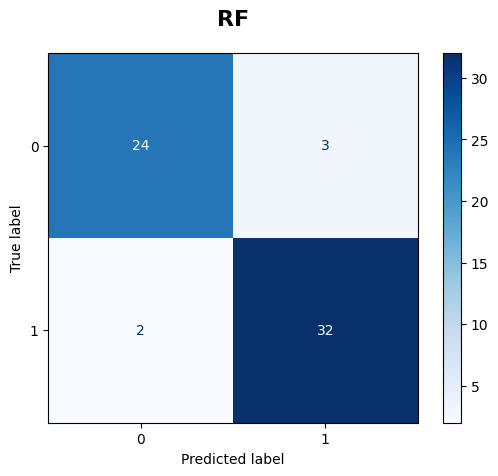

In [72]:
cm = confusion_matrix(Y_test, Y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('RF',fontsize=16, fontweight='bold',pad=20)
plt.show()

In [73]:
print(classification_report(Y_test, Y_pred_rf))
print('----------------------------------')

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.91      0.94      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

----------------------------------


# **ExtraTreesClassifier**

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
eet = ExtraTreesClassifier()


In [ ]:


max_accuracy = 0


for x in range(2000):
    eet = ExtraTreesClassifier(random_state=x,n_estimators=80,min_samples_split=20)
    eet.fit(X_train,Y_train)
    Y_pred_eet = eet.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_eet,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

eet = ExtraTreesClassifier(random_state=best_x,n_estimators=80,min_samples_split=20)
eet.fit(X_train,Y_train)
Y_pred_eet = eet.predict(X_test)
X_pred_eet = eet.predict(X_train)

In [ ]:
accuracy_test_eet = round(accuracy_score(Y_pred_eet,Y_test)*100,2)

print("The Test accuracy score achieved using Extra trees classifier is: "+str(accuracy_test_eet)+" %")

accuracy_train_eet = round(accuracy_score(X_pred_eet,Y_train)*100,2)

print("The Train accuracy score achieved using Extra trees classifier is: "+str(accuracy_train_eet)+" %")

The Test accuracy score achieved using Extra trees classifier is: 90.16 %
The Train accuracy score achieved using Extra trees classifier is: 90.91 %


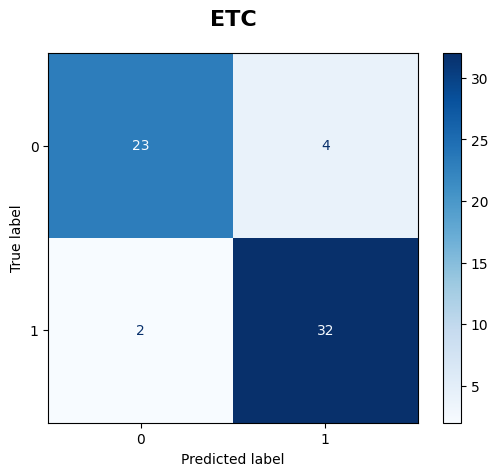

In [ ]:
cm = confusion_matrix(Y_test, Y_pred_eet, labels=eet.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=eet.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('ETC',fontsize=16, fontweight='bold',pad=20)
plt.show()

In [ ]:
print(classification_report(Y_test, Y_pred_eet))
print('----------------------------------')

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

----------------------------------


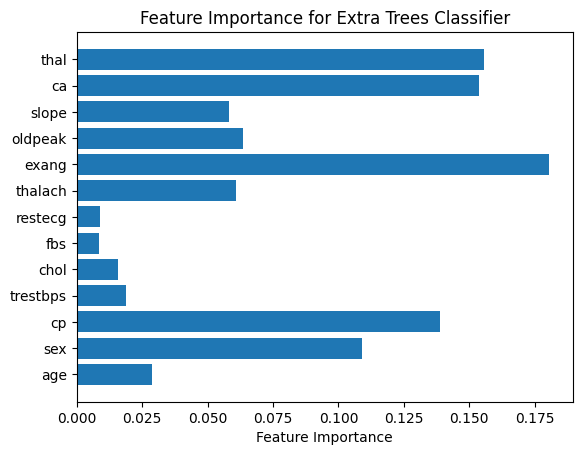

In [ ]:




feature_importance = eet.feature_importances_


feature_names = X_train.columns


plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Extra Trees Classifier')
plt.show()

### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)


param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],

}


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)


grid_search.fit(X_train, Y_train)


best_xgb_model = grid_search.best_estimator_

Y_pred_xgb = best_xgb_model.predict(X_test)
X_pred_xgb = best_xgb_model.predict(X_train)


from sklearn.metrics import accuracy_score
accuracy_test_xgb = round(accuracy_score(Y_test, Y_pred_xgb)*100,2)
accuracy_train_xgb = round(accuracy_score(Y_train, X_pred_xgb)*100,2)

print(f"Best XGBoost Model Test Accuracy: {accuracy_test_xgb}")
print(f"Best XGBoost Model Training Accuracy: {accuracy_train_xgb}")


Best XGBoost Model Test Accuracy: 83.61
Best XGBoost Model Training Accuracy: 85.95


In [ ]:
cm = confusion_matrix(Y_test, Y_pred_xgb, labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('XGB',fontsize=16, fontweight='bold',pad=20)
plt.show()

AttributeError: ignored

In [ ]:
print(classification_report(Y_test, Y_pred_xgb))
print('----------------------------------')

In [ ]:
feature_importance =best_xgb_model.feature_importances_


feature_names = X_train.columns


plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for XG boost')
plt.show()

# MLP - (Neural networks)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()

max_accuracy = 0


for x in range(200):
    mlp = MLPClassifier(random_state=x)
    mlp.fit(X_train,Y_train)
    Y_pred_mlp = mlp.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_mlp,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


mlp = MLPClassifier(random_state=best_x)
mlp.fit(X_train,Y_train)
Y_pred_mlp = mlp.predict(X_test)
X_pred_mlp = mlp.predict(X_train)

In [ ]:
accuracy_test_mlp = round(accuracy_score(Y_pred_mlp,Y_test)*100,2)

print("The test accuracy score achieved using MLP is: "+str(accuracy_test_mlp)+" %")

accuracy_train_mlp = round(accuracy_score(X_pred_mlp,Y_train)*100,2)

print("The train accuracy score achieved using MLP is: "+str(accuracy_train_mlp)+" %")

## VI. Output final score

In [ ]:
scores = [accuracy_train_lr,accuracy_train_nb,accuracy_train_svm,accuracy_train_knn,accuracy_train_dt,accuracy_train_rf,accuracy_train_xgb,accuracy_train_eet,accuracy_train_mlp]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","ExtraTreesClassifier","MLPClassifier"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

In [ ]:
trainscores = [accuracy_test_lr,accuracy_test_nb,accuracy_test_svm,accuracy_test_knn,accuracy_test_dt,accuracy_test_rf,accuracy_test_xgb,accuracy_test_eet,accuracy_test_mlp]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","ExtraTreesClassifier","MLPClassifier"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(trainscores[i])+" %")

In [ ]:
import pandas as pd
from tabulate import tabulate


data = {
    "Algorithm": algorithms,
    "Train Accuracy (%)": scores,
    "Test Accuracy (%)": trainscores
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the table
print(tabulate(df, headers='keys', tablefmt='psql'))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(5,5)})

scores = [accuracy_train_lr, score_nb, score_svm, score_knn, accuracy_train_dt, score_rf, score_xgb, score_eet]
algorithms = ["LR", "NVB", "SVM", "KNN", "DT", "RF", "XGB", "ETC"]

# Create a DataFrame for better handling
data = {"Algorithms": algorithms, "Accuracy Score": scores}
df = pd.DataFrame(data)

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# Use the DataFrame for the barplot
sns.barplot(x="Algorithms", y="Accuracy Score", data=df)

plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score


eet = ExtraTreesClassifier(random_state=best_x)
eet.fit(X_train, Y_train)
Y_pred_eet = eet.predict(X_test)

# Calculate the AUC
auc = roc_auc_score(Y_test, Y_pred_eet)

print("AUC:", auc)

### Hey arbaaz there random forest has good result as compare to other algorithms <br> <br>